# Importing libraries and csv files

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer
nltk.download('wordnet') 
nltk.download('omw-1.4')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data = pd.read_csv('dollhouse.csv')
data2 = pd.read_csv('dollhouse2.csv')
data3 = pd.read_csv('dollhouse3.csv')
data4 = pd.read_csv('additional_dollhouse.csv')

# Cleaning data

In [4]:
data.head()

,product,date,title,rating,body
0,Amazon.co.uk:Customer reviews: Barbie Doll Hou...,Reviewed in the United Kingdom on 26 October 2022,Absolute rubbish!!,3.0 out of 5 stars,"So flimsy, no value for money at all. Gone bac..."
1,Amazon.co.uk:Customer reviews: Barbie Doll Hou...,Reviewed in the United Kingdom on 13 June 2022,Fantastic product,5.0 out of 5 stars,Gifted it for my daughters 6th birthday and sh...
2,Amazon.co.uk:Customer reviews: Barbie Doll Hou...,Reviewed in the United Kingdom on 21 October 2022,it dosent come with a barbie doll,5.0 out of 5 stars,9year old loves it amazing for christmas
3,Amazon.co.uk:Customer reviews: Barbie Doll Hou...,Reviewed in France on 10 October 2022,Cadeau noel,5.0 out of 5 stars,Tres jolie cadeau.Offert à noelAttention il ny...
4,Amazon.co.uk:Customer reviews: Barbie Doll Hou...,Reviewed in France on 2 March 2022,Belle maison mais ...,4.0 out of 5 stars,J'ai bien reçu cette grosse boite contenant la...


In [5]:
data2.head()

,product,date,title,rating,body
0,Amazon.co.uk:Customer reviews: Le Toy Van - Ch...,Reviewed in the United Kingdom 🇬🇧 on 22 July 2019,A traditional wooden doll's house designed by ...,5.0 out of 5 stars,Sophie's Doll's House by Le Toy Van is a tradi...
1,Amazon.co.uk:Customer reviews: Le Toy Van - Ch...,Reviewed in the United Kingdom 🇬🇧 on 16 July 2019,"Creative, imagination inspiring house!",5.0 out of 5 stars,"An absolutely beautiful, imagination inspiring..."
2,Amazon.co.uk:Customer reviews: Le Toy Van - Ch...,Reviewed in the United Kingdom 🇬🇧 on 18 Novemb...,Oh my!,5.0 out of 5 stars,"First of all, this isn't a doll's house - it's..."
3,Amazon.co.uk:Customer reviews: Le Toy Van - Ch...,Reviewed in the United Kingdom 🇬🇧 on 13 Decemb...,A triumph,5.0 out of 5 stars,This is without a doubt a dolls house with ‘wo...
4,Amazon.co.uk:Customer reviews: Le Toy Van - Ch...,Reviewed in the United Kingdom 🇬🇧 on 3 Septemb...,Very Good,5.0 out of 5 stars,This is one of those defining types of toys/gi...


In [6]:
data3.head()

,product,date,title,rating,body
0,Amazon.co.uk:Customer reviews: Melissa &amp; D...,Reviewed in Canada 🇨🇦 on 26 December 2018,Good product,5.0 out of 5 stars,Perfect! Very well made
1,Amazon.co.uk:Customer reviews: Melissa &amp; D...,Reviewed in Mexico 🇲🇽 on 26 November 2019,Caja rota,3.0 out of 5 stars,"Muy buena calidad la casita ,lo único malo fue..."
2,Amazon.co.uk:Customer reviews: Melissa &amp; D...,Reviewed in France 🇫🇷 on 22 July 2019,Magnifique,5.0 out of 5 stars,Identique a la photo!Maison de qualité elle es...
3,Amazon.co.uk:Customer reviews: Melissa &amp; D...,Reviewed in Germany on 17 January 2016,Super Puppenhaus,5.0 out of 5 stars,Super Spielhaus von der Grösse und Haptik. Bau...
4,Amazon.co.uk:Customer reviews: Melissa &amp; D...,Reviewed in Italy 🇮🇹 on 17 January 2017,bel prodotto,4.0 out of 5 stars,"Montarlo non è stato semplicissimo, ma la casa..."


In [7]:
data4.head()

,product,date,title,rating,body
0,Amazon.co.uk:Customer reviews: KOOKYLOOS Luna’...,Reviewed in the United Kingdom on 30 September...,cheap,1.0 out of 5 stars,Fort what you pay for this is not worth it jus...
1,Amazon.co.uk:Customer reviews: TOP BRIGHT Wood...,Reviewed in the United Kingdom on 20 September...,Love this!!!!!,5.0 out of 5 stars,Highly recommend
2,Amazon.co.uk:Customer reviews: TOP BRIGHT Wood...,Reviewed in the United Kingdom on 23 December ...,Missing parts,3.0 out of 5 stars,Purchased as a Christmas gift but when opened ...
3,Amazon.co.uk:Customer reviews: TOP BRIGHT Wood...,Reviewed in the United Kingdom on 30 December ...,Great Present for Daughter,4.0 out of 5 stars,Bought for daughters Christmas present and she...
4,Amazon.co.uk:Customer reviews: TOP BRIGHT Wood...,Reviewed in the United Kingdom on 15 June 2020,Not the best but good,3.0 out of 5 stars,"Overall fine, bits were broken and split, and ..."


Creating functions for cleaning

In [8]:
def clean_product_rating(df):
    df['product'] = df['product'].str.replace('Amazon.co.uk:Customer reviews: ', '')
    df['rating'] = df['rating'].str.replace(' out of 5 stars', '')

In [9]:
def split_date_country(df):
    df[['country','date']]=df["date"].str.split("on",expand=True)
    df['country'] = df['country'].str.replace('Reviewed in ', '')
    df['country'] = df['country'].str.replace('the United Kingdom', 'UK')
    df['country'] = df['country'].str.replace('the United States', 'USA')
    
    country = []
    for c in df['country']:
        c = c.split(' ')[0]
        country.append(c)

    df['country'] = country

In [10]:
def clean_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year 
    df['month'] = df['date'].dt.month 
    df['weekday'] = df['date'].dt.day_name()

In [11]:
# All files have the same format so I can concat them already and then clean the df

In [12]:
reviews = pd.concat([data, data2, data3, data4], axis=0)

In [13]:
reviews.tail()

,product,date,title,rating,body
10303,Amazon.co.uk:Customer reviews: deAO Children’s...,Reviewed in Italy 🇮🇹 on 30 December 2020,Bella valigetta-casa delle bambole,5.0 out of 5 stars,"Molto carina e ben fatta, con tutti gli access..."
10304,Amazon.co.uk:Customer reviews: deAO Children’s...,Reviewed in France 🇫🇷 on 14 October 2019,Superbe petite maison,5.0 out of 5 stars,Très jolie et plein d accesoires je pense que ...
10305,Amazon.co.uk:Customer reviews: deAO Children’s...,Reviewed in Germany on 16 December 2019,Einwandfrei,5.0 out of 5 stars,Sehr schönes Haus mit reichlich Zubehör
10306,Amazon.co.uk:Customer reviews: deAO Children’s...,Reviewed in Italy 🇮🇹 on 24 December 2019,Bah,2.0 out of 5 stars,Scusate ma ho messo le batterie e non suona ne...
10307,Amazon.co.uk:Customer reviews: deAO Children’s...,Reviewed in Italy on 28 December 2019,Ottimo,5.0 out of 5 stars,Ottimo prodotto. Consigliato


In [14]:
clean_product_rating(reviews)

C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\4124612624.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['product'] = df['product'].str.replace('Amazon.co.uk:Customer reviews: ', '')


In [15]:
# split_date_country(reviews) - function not working because of to Nan value

In [16]:
reviews.isna().sum()

product     0
date        1
title       0
rating      0
body       43
dtype: int64

In [17]:
reviews[['country','date']]=reviews['date'].str.split("on",expand=True)
reviews['country'] = reviews['country'].str.replace('Reviewed in ', '')
reviews['country'].value_counts(dropna=False)
reviews['country'] = reviews['country'].str.replace('the United Kingdom', 'UK')
reviews['country'] = reviews['country'].str.replace('the United States', 'USA')

In [18]:
reviews[reviews['country'].isna()] #language is Swedish

,product,date,title,rating,body,country
1872,Kidkraft 65833 Uptown Wooden Dolls House With ...,NaN,Saknades en del,3.0,Älskar detta dockhus men en av delarna saknade...,NaN


In [19]:
reviews['country'] = reviews['country'].fillna('Sweden') 

country = []

for c in reviews['country']:
    c = c.split(' ')[0]
    country.append(c)

reviews['country'] = country

In [20]:
reviews['country'].value_counts(dropna=False)

UK           16336
USA           1943
Italy          645
France         473
Germany        433
Canada         409
Spain          307
Mexico         105
Brazil          10
Australia       10
Singapore        5
India            5
Japan            3
Sweden           1
Name: country, dtype: int64

In [21]:
clean_date(reviews)

In [22]:
reviews

,product,date,title,rating,body,country,year,month,weekday
0,Barbie Doll House | Chelsea Playhouse with 2 P...,2022-10-26,Absolute rubbish!!,3.0,"So flimsy, no value for money at all. Gone bac...",UK,2022.0,10.0,Wednesday
1,Barbie Doll House | Chelsea Playhouse with 2 P...,2022-06-13,Fantastic product,5.0,Gifted it for my daughters 6th birthday and sh...,UK,2022.0,6.0,Monday
2,Barbie Doll House | Chelsea Playhouse with 2 P...,2022-10-21,it dosent come with a barbie doll,5.0,9year old loves it amazing for christmas,UK,2022.0,10.0,Friday
3,Barbie Doll House | Chelsea Playhouse with 2 P...,2022-10-10,Cadeau noel,5.0,Tres jolie cadeau.Offert à noelAttention il ny...,France,2022.0,10.0,Monday
4,Barbie Doll House | Chelsea Playhouse with 2 P...,2022-03-02,Belle maison mais ...,4.0,J'ai bien reçu cette grosse boite contenant la...,France,2022.0,3.0,Wednesday
...,...,...,...,...,...,...,...,...,...
10303,deAO Children’s 2-In-1 Pink Portable Doll Hous...,2020-12-30,Bella valigetta-casa delle bambole,5.0,"Molto carina e ben fatta, con tutti gli access...",Italy,2020.0,12.0,Wednesday
10304,deAO Children’s 2-In-1 Pink Portable Doll Hous...,2019-10-14,Superbe petite maison,5.0,Très jolie et plein d accesoires je pense que ...,France,2019.0,10.0,Monday
10305,deAO Children’s 2-In-1 Pink Portable Doll Hous...,2019-12-16,Einwandfrei,5.0,Sehr schönes Haus mit reichlich Zubehör,Germany,2019.0,12.0,Monday
10306,deAO Children’s 2-In-1 Pink Portable Doll Hous...,2019-12-24,Bah,2.0,Scusate ma ho messo le batterie e non suona ne...,Italy,2019.0,12.0,Tuesday


In [23]:
reviews['date'] = reviews['date'].dt.strftime('%m-%d')

In [24]:
reviews.isna().sum()

product     0
date        1
title       0
rating      0
body       43
country     0
year        1
month       1
weekday     1
dtype: int64

In [25]:
reviews[reviews['year'].isna()] 

,product,date,title,rating,body,country,year,month,weekday
1872,Kidkraft 65833 Uptown Wooden Dolls House With ...,NaN,Saknades en del,3.0,Älskar detta dockhus men en av delarna saknade...,Sweden,NaN,NaN,NaN


In [26]:
reviews['year'].value_counts(dropna=False)

2021.0    4493
2020.0    4304
2019.0    2779
2022.0    2699
2018.0    1192
2015.0    1017
2016.0    1003
2017.0     988
2014.0     833
2013.0     708
2012.0     288
2011.0     251
2010.0      77
2009.0      45
2008.0       7
NaN          1
Name: year, dtype: int64

In [27]:
reviews['month'].value_counts(dropna=False)

12.0    4041
1.0     3992
2.0     1521
11.0    1513
10.0    1502
7.0     1331
3.0     1298
8.0     1287
9.0     1180
4.0     1046
6.0      994
5.0      979
NaN        1
Name: month, dtype: int64

In [28]:
reviews['date'].value_counts(dropna=False)

12-25    430
12-26    380
12-30    336
12-27    320
12-29    265
        ... 
05-19      7
06-03      7
02-29      4
04-26      3
NaN        1
Name: date, Length: 367, dtype: int64

In [32]:
reviews['weekday'].value_counts(dropna=False)

Wednesday    3259
Sunday       3090
Monday       2974
Tuesday      2913
Friday       2877
Thursday     2810
Saturday     2761
NaN             1
Name: weekday, dtype: int64

In [ ]:
#I will fill NaNs with the mode

In [33]:
reviews['year'] = reviews['year'].fillna('2021') 
reviews['month'] = reviews['month'].fillna('12') 
reviews['date'] = reviews['month'].fillna('12-25')
reviews['weekday'] = reviews['month'].fillna('Wednesday')

In [30]:
# change data type to int
reviews['year'] = reviews['year'].apply(np.int64)
reviews['month'] = reviews['month'].apply(np.int64)

In [34]:
reviews.isna().sum()

product     0
date        0
title       0
rating      0
body       43
country     0
year        0
month       0
weekday     0
dtype: int64

In [35]:
reviews[reviews['body'].isna()] # will fill NaN with title

,product,date,title,rating,body,country,year,month,weekday
1050,EYEPOWER Two-storey Wooden Dollhouse | Incl Fu...,2,"Très jolie, facile à monter, un peu déçue de l...",3.0,NaN,France,2022,2,2
1586,"Olivia&#39;s Little World Tiffany Dollhouse, L...",2,Not happy with,1.0,NaN,UK,2022,2,2
1933,Liberty House Toys Contemporary Dolls House wi...,1,Disappointed with furniture as its all broke,4.0,NaN,UK,2022,1,1
2085,"CUTEBEE DIY Miniature Dolls House Kit, Wooden ...",1,Very nice,5.0,NaN,UK,2022,1,1
2212,Amazon Basics 4-Story Wooden Dollhouse and Fur...,2,"Rifiniture pessime, accessori belli ma scollat...",1.0,NaN,Italy,2022,2,2
3486,EYEPOWER Two-storey Wooden Dollhouse | Incl Fu...,2,"Très jolie, facile à monter, un peu déçue de l...",3.0,NaN,France,2022,2,2
3745,"Olivia&#39;s Little World Tiffany Dollhouse, L...",2,Not happy with,1.0,NaN,UK,2022,2,2
3951,Lundby Dolls House – Expandable Doll House for...,6,Got. Mine broken so very upset & didn’t know h...,2.0,NaN,UK,2022,6,6
3962,Liberty House Toys Contemporary Dolls House wi...,1,Disappointed with furniture as its all broke,4.0,NaN,UK,2022,1,1
4248,Amazon Basics 4-Story Wooden Dollhouse and Fur...,2,"Rifiniture pessime, accessori belli ma scollat...",1.0,NaN,Italy,2022,2,2


In [36]:
reviews['body'] = reviews['body'].fillna(reviews['title'])

In [37]:
reviews.isna().sum()

product    0
date       0
title      0
rating     0
body       0
country    0
year       0
month      0
weekday    0
dtype: int64

In [38]:
# the same products where sometimes shown on multiple seach pages so I have to drop duplicates

In [39]:
reviews = reviews.drop_duplicates()

In [40]:
reviews

,product,date,title,rating,body,country,year,month,weekday
0,Barbie Doll House | Chelsea Playhouse with 2 P...,10,Absolute rubbish!!,3.0,"So flimsy, no value for money at all. Gone bac...",UK,2022,10,10
1,Barbie Doll House | Chelsea Playhouse with 2 P...,6,Fantastic product,5.0,Gifted it for my daughters 6th birthday and sh...,UK,2022,6,6
2,Barbie Doll House | Chelsea Playhouse with 2 P...,10,it dosent come with a barbie doll,5.0,9year old loves it amazing for christmas,UK,2022,10,10
3,Barbie Doll House | Chelsea Playhouse with 2 P...,10,Cadeau noel,5.0,Tres jolie cadeau.Offert à noelAttention il ny...,France,2022,10,10
4,Barbie Doll House | Chelsea Playhouse with 2 P...,3,Belle maison mais ...,4.0,J'ai bien reçu cette grosse boite contenant la...,France,2022,3,3
...,...,...,...,...,...,...,...,...,...
8713,Playmobil Dollhouse 5167 Take Along Modern Dol...,2,Playmobil,5.0,Wie es sein soll,Germany,2022,2,2
8715,Playmobil Dollhouse 5167 Take Along Modern Dol...,4,"Ein Puppenhaus - klein, aber herzallerliebst!",5.0,Was für ein reizendes Puppenhaus. Es macht Fre...,Germany,2019,4,4
8717,Playmobil Dollhouse 5167 Take Along Modern Dol...,11,Mein schönstes Puppenhaus,5.0,Zum 4.Geburtstag hat unsere Tochter das Puppen...,Germany,2020,11,11
8718,Playmobil Dollhouse 5167 Take Along Modern Dol...,2,RAS,5.0,"livraison rapide, article conforme",France,2022,2,2


In [41]:
reviews['product'] = reviews['product'].str.replace('&amp; ', 'and ')
reviews['product'] = reviews['product'].str.replace("&#39;s", "'s")

C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\99018193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['product'] = reviews['product'].str.replace('&amp; ', 'and ')
C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\99018193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['product'] = reviews['product'].str.replace("&#39;s", "'s")


In [43]:
reviews["number_of_words"] = reviews["body"].apply(lambda n: len(n.split()))

C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\2862018364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["number_of_words"] = reviews["body"].apply(lambda n: len(n.split()))


In [44]:
reviews.head()

,product,date,title,rating,body,country,year,month,weekday,number_of_words
0,Barbie Doll House | Chelsea Playhouse with 2 P...,10,Absolute rubbish!!,3.0,"So flimsy, no value for money at all. Gone bac...",UK,2022,10,10,25
1,Barbie Doll House | Chelsea Playhouse with 2 P...,6,Fantastic product,5.0,Gifted it for my daughters 6th birthday and sh...,UK,2022,6,6,35
2,Barbie Doll House | Chelsea Playhouse with 2 P...,10,it dosent come with a barbie doll,5.0,9year old loves it amazing for christmas,UK,2022,10,10,7
3,Barbie Doll House | Chelsea Playhouse with 2 P...,10,Cadeau noel,5.0,Tres jolie cadeau.Offert à noelAttention il ny...,France,2022,10,10,12
4,Barbie Doll House | Chelsea Playhouse with 2 P...,3,Belle maison mais ...,4.0,J'ai bien reçu cette grosse boite contenant la...,France,2022,3,3,112


# Saving cleand data

In [45]:
reviews.to_csv('reviews_cleaned.csv', index=False)

# Splitting into more dataframes

In [46]:
good = reviews[(reviews['rating'] == '5.0') | (reviews['rating'] == '4.0') ]

In [47]:
good

,product,date,title,rating,body,country,year,month,weekday,number_of_words
1,Barbie Doll House | Chelsea Playhouse with 2 P...,6,Fantastic product,5.0,Gifted it for my daughters 6th birthday and sh...,UK,2022,6,6,35
2,Barbie Doll House | Chelsea Playhouse with 2 P...,10,it dosent come with a barbie doll,5.0,9year old loves it amazing for christmas,UK,2022,10,10,7
3,Barbie Doll House | Chelsea Playhouse with 2 P...,10,Cadeau noel,5.0,Tres jolie cadeau.Offert à noelAttention il ny...,France,2022,10,10,12
4,Barbie Doll House | Chelsea Playhouse with 2 P...,3,Belle maison mais ...,4.0,J'ai bien reçu cette grosse boite contenant la...,France,2022,3,3,112
5,Barbie Doll House | Chelsea Playhouse with 2 P...,3,Sehr hübsches und durchdachtes Spielhaus für C...,5.0,Meine Tochter ist ein großer Barbie Fan. Da si...,Germany,2022,3,3,184
...,...,...,...,...,...,...,...,...,...,...
8713,Playmobil Dollhouse 5167 Take Along Modern Dol...,2,Playmobil,5.0,Wie es sein soll,Germany,2022,2,2,4
8715,Playmobil Dollhouse 5167 Take Along Modern Dol...,4,"Ein Puppenhaus - klein, aber herzallerliebst!",5.0,Was für ein reizendes Puppenhaus. Es macht Fre...,Germany,2019,4,4,151
8717,Playmobil Dollhouse 5167 Take Along Modern Dol...,11,Mein schönstes Puppenhaus,5.0,Zum 4.Geburtstag hat unsere Tochter das Puppen...,Germany,2020,11,11,79
8718,Playmobil Dollhouse 5167 Take Along Modern Dol...,2,RAS,5.0,"livraison rapide, article conforme",France,2022,2,2,4


In [48]:
neutral = reviews[reviews['rating'] == '3.0']

In [49]:
neutral

,product,date,title,rating,body,country,year,month,weekday,number_of_words
0,Barbie Doll House | Chelsea Playhouse with 2 P...,10,Absolute rubbish!!,3.0,"So flimsy, no value for money at all. Gone bac...",UK,2022,10,10,25
20,Olivia’s Little World Kids Large Dolls House w...,12,Perfect house just disappointed with the stairs,3.0,The house is fab and really easy to assemble. ...,UK,2020,12,12,51
23,Olivia’s Little World Kids Large Dolls House w...,4,Flecken auf Einrichtungsgegeständen,3.0,Mit dem Puppenhaus an sich sind wir zufrieden....,Germany,2020,4,4,42
32,Le Toy Van - Cherry Tree Hall Large Wooden Dol...,12,Poor finish for such an expensive dolls house.,3.0,"It’s a nice size, it seems sturdy enough and l...",UK,2019,12,12,85
41,Le Toy Van - Cherry Tree Hall Large Wooden Dol...,8,Beautiful but damaged.,3.0,Beautiful dolls house which my daughter loves ...,UK,2020,8,8,31
...,...,...,...,...,...,...,...,...,...,...
5807,Playmobil Dollhouse - 70205 Large Dollhouse wi...,4,Not impressed,3.0,I can’t help but feel disappointed in this ite...,UK,2021,4,4,73
5808,Playmobil Dollhouse - 70205 Large Dollhouse wi...,1,Quite flimsy and takes a while to build,3.0,"Took about 3.5hrs to assemble, some maybe able...",UK,2021,1,1,55
5811,Playmobil Dollhouse - 70205 Large Dollhouse wi...,12,Parts missing,3.0,Opened box today to build it for my daughter a...,UK,2020,12,12,30
5812,Playmobil Dollhouse - 70205 Large Dollhouse wi...,1,Window missing,3.0,All in all excellent toy for children only dow...,UK,2021,1,1,20


In [107]:
bad = reviews[(reviews['rating'] == '2.0') | (reviews['rating'] == '1.0') ]

In [51]:
bad

,product,date,title,rating,body,country,year,month,weekday,number_of_words
24,Olivia’s Little World Kids Large Dolls House w...,9,Vera,1.0,Wir haben leider eine Küche geliefert bekommen,Germany,2020,9,9,7
51,Le Toy Van - Cherry Tree Hall Large Wooden Dol...,12,Item arrived damaged but only found out on Chr...,1.0,I ordered the dolls house nice and early for C...,UK,2021,12,12,42
53,Le Toy Van - Cherry Tree Hall Large Wooden Dol...,12,Devastated,1.0,Its for a Christmas gift for my daughter. It w...,UK,2020,12,12,91
68,Le Toy Van - Cherry Tree Hall Large Wooden Dol...,6,Broken furniture,1.0,A couple of the Doll furniture came broken. Co...,UK,2021,6,6,21
138,KidKraft 65092 Dollhouse Kayla Wooden House wi...,11,Missing major part,2.0,Missing one of the floors!! Couldn't build at ...,UK,2021,11,11,93
...,...,...,...,...,...,...,...,...,...,...
5810,Playmobil Dollhouse - 70205 Large Dollhouse wi...,12,Item good but disappointed with Amazon,2.0,This item was good but disappointed with Amazo...,UK,2021,12,12,44
5815,Playmobil Dollhouse - 70205 Large Dollhouse wi...,10,Missing part !,2.0,Sadly we bought this early and when we went to...,UK,2021,10,10,22
5820,Playmobil Dollhouse - 70205 Large Dollhouse wi...,12,"Could be a great toy, but it was uncomplete...",2.0,The house looks good generally but :- There we...,Germany,2020,12,12,109
5823,​​MEGA Barbie Malibu House building set with 3...,8,"This is not LEGO brand, missing parts and very...",1.0,Purchased this building set for my 6year old's...,USA,2022,8,8,125


In [52]:
good.to_csv('good.csv', index=False)
bad.to_csv('bad.csv', index=False)
neutral.to_csv('neutral.csv', index=False)

# Naive Bayes Model

In [53]:
def tokenize(s):
    tokens = word_tokenize(s)
    return [word.lower() for word in tokens if word.isalnum()]

In [54]:
def stem_and_lemmatize(l):
    l_stem_lem = []
    ps = PorterStemmer() 
    lm = WordNetLemmatizer()
    for w in l: 
        w=ps.stem(w)
        w=lm.lemmatize(w)
        l_stem_lem.append(w)
    return l_stem_lem

In [55]:
def remove_stopwords(l):
    return [word for word in l if not word in stopwords.words()]

In [138]:
def remove_stopwords_eng(l):
    stop_words = set(stopwords.words('english')) 
    return [word for word in l if word not in stop_words]

In [56]:
def re_blob(row):
    return " ".join(row['text_processed'])

In [57]:
reviews["text_processed"]=reviews["body"].apply(tokenize)
print('1 done')

reviews["text_processed"]=reviews["text_processed"].apply(stem_and_lemmatize)
print('2 done')

reviews["text_processed"]=reviews["text_processed"].apply(remove_stopwords)
print('3 done')

reviews.head()

C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\3328076252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["text_processed"]=reviews["body"].apply(tokenize)


1 done


C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\3328076252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["text_processed"]=reviews["text_processed"].apply(stem_and_lemmatize)


2 done
3 done


C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\3328076252.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["text_processed"]=reviews["text_processed"].apply(remove_stopwords)


,product,date,title,rating,body,country,year,month,weekday,number_of_words,text_processed
0,Barbie Doll House | Chelsea Playhouse with 2 P...,10,Absolute rubbish!!,3.0,"So flimsy, no value for money at all. Gone bac...",UK,2022,10,10,25,"[flimsi, valu, money, back, wooden, doll, hous..."
1,Barbie Doll House | Chelsea Playhouse with 2 P...,6,Fantastic product,5.0,Gifted it for my daughters 6th birthday and sh...,UK,2022,6,6,35,"[gift, daughter, 6th, birthday, drawback, bit,..."
2,Barbie Doll House | Chelsea Playhouse with 2 P...,10,it dosent come with a barbie doll,5.0,9year old loves it amazing for christmas,UK,2022,10,10,7,"[9year, love, amaz, christma]"
3,Barbie Doll House | Chelsea Playhouse with 2 P...,10,Cadeau noel,5.0,Tres jolie cadeau.Offert à noelAttention il ny...,France,2022,10,10,12,"[tre, joli, noelattent, ny, barbi, dedan]"
4,Barbie Doll House | Chelsea Playhouse with 2 P...,3,Belle maison mais ...,4.0,J'ai bien reçu cette grosse boite contenant la...,France,2022,3,3,112,"[reçu, cett, gross, boit, conten, maison, coff..."


In [59]:
from nltk.probability import FreqDist

In [60]:
list_of_words = reviews["text_processed"].tolist()
list_of_words


bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)



freq_dist = FreqDist(bow)
top_5000 = freq_dist.most_common(5000)

In [61]:
word_features, freq = [[x for x,y in top_5000],
      [y for x,y in top_5000]]

In [62]:
def find_features(lst, bow):
    word_features=list(bow)
    words = set(lst)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

word_features
features=[]
for i,l in enumerate(reviews["text_processed"]):
    s=[find_features(l,bow),reviews["rating"].iloc[i]]
    z=tuple(s)
    features.append(z)
len(features)

6178

In [224]:
train_set, test_set = features[3000:], features[:3000]

In [225]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [226]:
classifier.show_most_informative_features()

Most Informative Features
                   upset = True              1.0 : 5.0    =     55.9 : 1.0
                  return = True              1.0 : 5.0    =     53.4 : 1.0
                    wast = True              1.0 : 5.0    =     51.5 : 1.0
                    déçu = True              3.0 : 5.0    =     49.5 : 1.0
                     rip = True              1.0 : 5.0    =     48.5 : 1.0
                nightmar = True              2.0 : 5.0    =     47.1 : 1.0
                    peel = True              1.0 : 5.0    =     47.0 : 1.0
                    poor = True              1.0 : 5.0    =     43.5 : 1.0
                    send = True              2.0 : 5.0    =     37.5 : 1.0
              disappoint = True              2.0 : 5.0    =     33.7 : 1.0


In [227]:
nltk.classify.accuracy(classifier, test_set)

0.6826666666666666

# KNeigbours Cluster

In [68]:
reviews["blob"]=reviews.apply(re_blob,axis=1)

C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\2811913938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["blob"]=reviews.apply(re_blob,axis=1)


In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster

In [71]:
bow_vect = CountVectorizer(max_features=1000)
X = bow_vect.fit_transform(reviews['blob']).toarray()

In [72]:
re_df = pd.DataFrame(X,columns=bow_vect.get_feature_names())
re_df.head()

C:\Users\jasmi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,12,20,2nd,30,3rd,4th,50,5th,...,wrong,wurd,xma,year,young,younger,youtub,yr,zusammen,ça
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

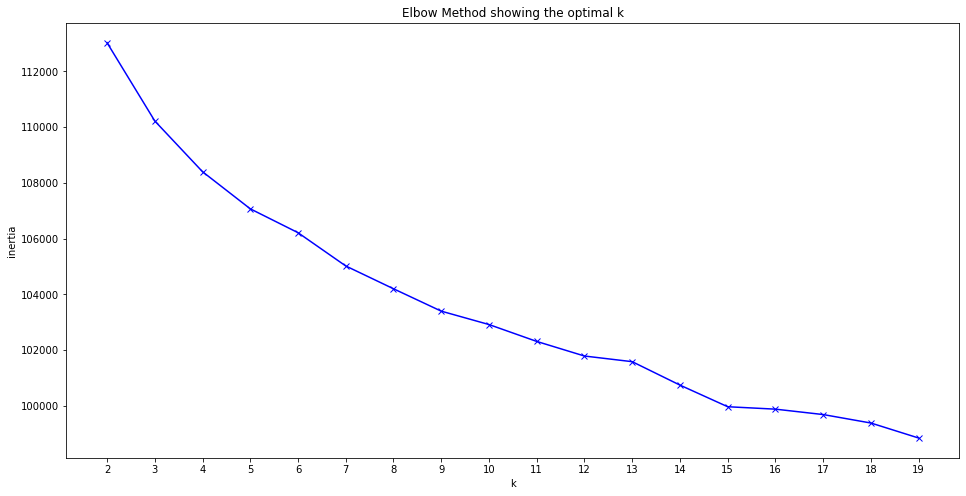

In [74]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

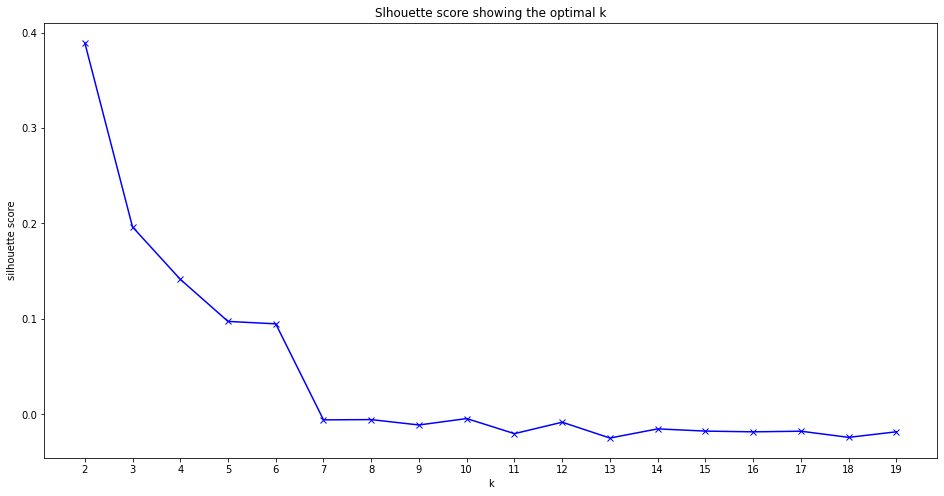

In [75]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [76]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(X)
re_pred = kmeans.predict(X)

In [78]:
reviews = reviews.reset_index()

In [79]:
predict_re = pd.concat([reviews['body'],pd.DataFrame(re_pred,columns=['class'])],axis=1)
predict_re.head()

,body,class
0,"So flimsy, no value for money at all. Gone bac...",1
1,Gifted it for my daughters 6th birthday and sh...,1
2,9year old loves it amazing for christmas,1
3,Tres jolie cadeau.Offert à noelAttention il ny...,1
4,J'ai bien reçu cette grosse boite contenant la...,1


In [80]:
predict_re[predict_re['class']==0]

,body,class
8,Brilliant really lovely dolls house daughter l...,0
9,Very happy with the doll house. I put this tog...,0
10,"Beautiful house, my 3 year old daughter loves ...",0
12,My 5 year old loves it. Quality of this house ...,0
15,Clear instructions easy to put together. Very ...,0
...,...,...
6143,Very cute and very big doll house. Like all th...,0
6146,The kids have been playing for hours.!!! I wis...,0
6157,I should have read the dimensions more careful...,0
6158,"Pretty easy to assemble, my 22 year old daugh...",0


In [223]:
predict_re.iloc[6143]['body']

'Very cute and very big doll house. Like all the other reviews it did take 4 hours to do. And sadly I could only do it last night but it got done. My girl loves it. Tools were all lettered instructions not the most clear. I referred to the pictures on here and that helped a lot. Defiently worth the money for such a cute and large doll house!'

In [81]:
predict_re[predict_re['class']==1]

,body,class
0,"So flimsy, no value for money at all. Gone bac...",1
1,Gifted it for my daughters 6th birthday and sh...,1
2,9year old loves it amazing for christmas,1
3,Tres jolie cadeau.Offert à noelAttention il ny...,1
4,J'ai bien reçu cette grosse boite contenant la...,1
...,...,...
6173,Wie es sein soll,1
6174,Was für ein reizendes Puppenhaus. Es macht Fre...,1
6175,Zum 4.Geburtstag hat unsere Tochter das Puppen...,1
6176,"livraison rapide, article conforme",1


# EDA

## distribution plots

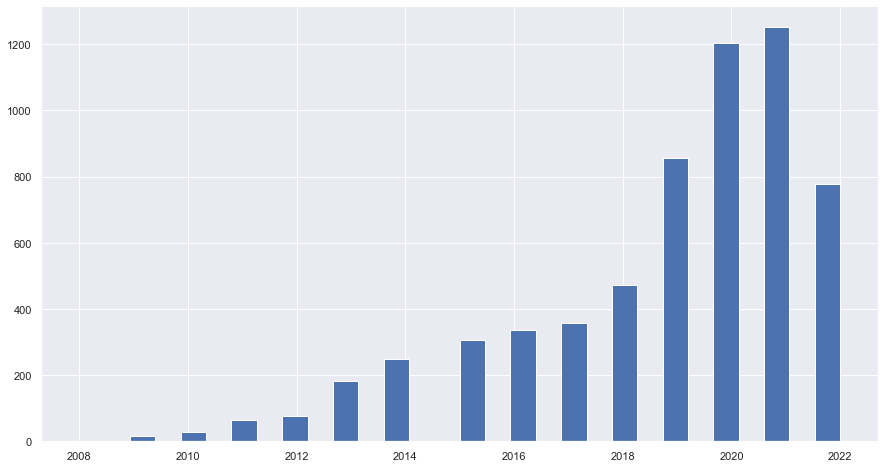

In [86]:
reviews['year'].hist(bins=30)
plt.show()

<AxesSubplot:>

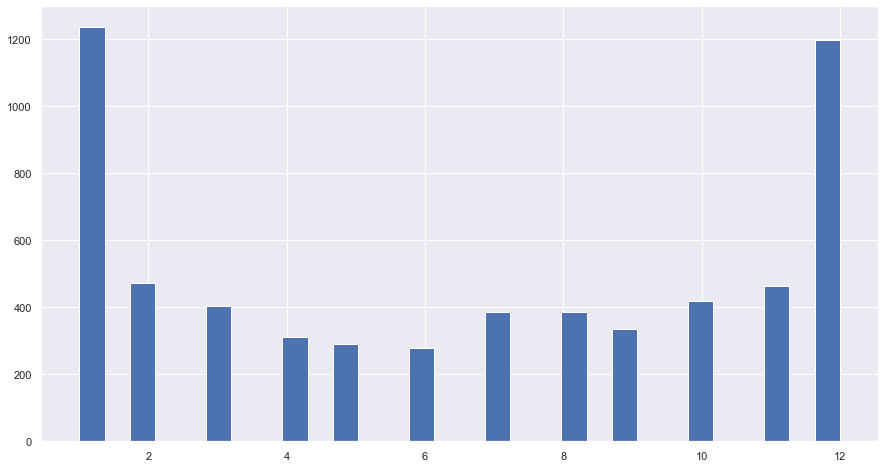

In [87]:
reviews['month'].hist(bins=30)

<AxesSubplot:>

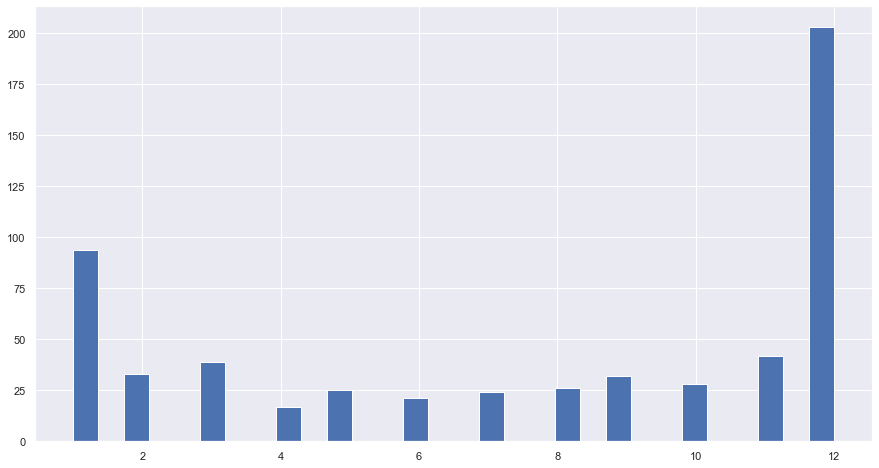

In [89]:
bad['month'].hist(bins=30)

## explore number of words with aggregation

In [92]:
reviews.pivot_table(index= ['country'], values = ['number_of_words'], aggfunc = ['mean']).reset_index()

,country,mean
,,number_of_words
0,Australia,48.400000
1,Brazil,12.500000
2,Canada,38.368852
3,France,35.659751
4,Germany,44.650000
5,India,12.000000
6,Italy,34.226629
7,Japan,1.000000
8,Mexico,29.611111


In [93]:
reviews.pivot_table(index= ['rating'], values = ['number_of_words'], aggfunc = ['mean']).reset_index()

,rating,mean
,,number_of_words
0,1.0,48.045576
1,2.0,49.047393
2,3.0,57.469444
3,4.0,62.329532
4,5.0,38.854946


## brands / items with most reviews

### most reviewed brands

In [96]:
reviews['brands'] = reviews['product'].str.split(' ').str[0]

In [97]:
reviews['brands'].value_counts(dropna=False) 

KidKraft       1515
Kidkraft       1107
Playmobil       706
Barbie          476
Le              294
Melissa         290
Hape            163
CUTEBEE         148
PEPPA           147
ROBOTIME        143
LEGO            136
LOL              99
SumDirect        94
Bigjigs          90
Kids             90
Sylvanian        76
deAO             68
TOP              64
Rainbow          52
Milliard         41
Lottie           35
Olivia's         33
GILOBABY         31
Sustainable      31
Gabby’s          28
DIY              28
Wooden           22
Lundby           20
Fsolis           17
Disney           17
Olivia’s         15
Rolife           15
Amazon           14
Liberty          14
Teamson          10
EYEPOWER          9
Cuteefun          7
Miniature         6
LAWASEN           6
Eichhorn          5
​​MEGA            5
Doll              3
erhumama          3
Kavolet           2
HYGRAD®           1
KOOKYLOOS         1
ROBUD             1
Name: brands, dtype: int64

In [98]:
reviews = reviews[~reviews['brands'].isin(['Playmobil', 'Barbie', 'LEGO'])] #dropping those brands as my analysis is about wooden dollhouses

 ### items with most negative reviews

In [108]:
bad['brands'] = bad['product'].str.split(' ').str[0]

C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\2008868972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['brands'] = bad['product'].str.split(' ').str[0]


In [109]:
bad = bad[~bad['brands'].isin(['Playmobil', 'Barbie', 'LEGO'])] #dropping those brands as my analysis is about wooden dollhouses

In [110]:
bad['product'].value_counts(dropna=False)

KidKraft 65092 Dollhouse Kayla Wooden House with Furniture and Accessories Included, 3 Storey Play Set for 30 cm/12 Inch Dolls, Multi - Amazon Exclusive                                                  70
Kidkraft 65833 Uptown Wooden Dolls House With Furniture And Accessories Included, 3 Storey Play Set For 30 cm/ 12 Inch Dolls                                                                              59
Kidkraft 65252 Majestic Mansion Wooden Dolls House With Furniture And Accessories Included, 4 Storey Play Set For 30 cm / 12 Inch Dolls - Amazon Exclusive                                                47
KidKraft 65093 Amelia Wooden Dolls House with Furniture and Accessories Included, 3 Storey Play Set for 30 cm/12 Inch Dolls                                                                               41
KidKraft 65054 Chelsea Cottage Wooden Dolls House with Furniture and Accessories Included, 3 Storey Play Set for 12 cm Dolls - Amazon Exclusive                                     

 ### items with most positive reviews

In [111]:
good['brands'] = good['product'].str.split(' ').str[0]

C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\931965175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['brands'] = good['product'].str.split(' ').str[0]


In [112]:
good = good[~good['brands'].isin(['Playmobil', 'Barbie', 'LEGO'])] #dropping those brands as my analysis is about wooden dollhouses

In [113]:
good['product'].value_counts(dropna=False)

Kidkraft 65252 Majestic Mansion Wooden Dolls House With Furniture And Accessories Included, 4 Storey Play Set For 30 cm / 12 Inch Dolls - Amazon Exclusive                                 632
KidKraft 65092 Dollhouse Kayla Wooden House with Furniture and Accessories Included, 3 Storey Play Set for 30 cm/12 Inch Dolls, Multi - Amazon Exclusive                                   558
KidKraft 65054 Chelsea Cottage Wooden Dolls House with Furniture and Accessories Included, 3 Storey Play Set for 12 cm Dolls - Amazon Exclusive                                            350
Kidkraft 65833 Uptown Wooden Dolls House With Furniture And Accessories Included, 3 Storey Play Set For 30 cm/ 12 Inch Dolls                                                               310
KidKraft 65093 Amelia Wooden Dolls House with Furniture and Accessories Included, 3 Storey Play Set for 30 cm/12 Inch Dolls                                                                292
                                             

### Creating bags of words and word clouds

Positive Reviews

In [115]:
good_most_words =good["body"].apply(tokenize)
print('1 done')

good_most_words =good_most_words.apply(remove_stopwords_eng)
print('2 done')

1 done
2 done


In [116]:
list_of_words = good_most_words.tolist()
list_of_words

# Create one list of all words
bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)
#print(bow)

# Create frequency with words
freq_dist = FreqDist(bow)
top_100_good = freq_dist.most_common(100)

In [118]:
# top_100_good

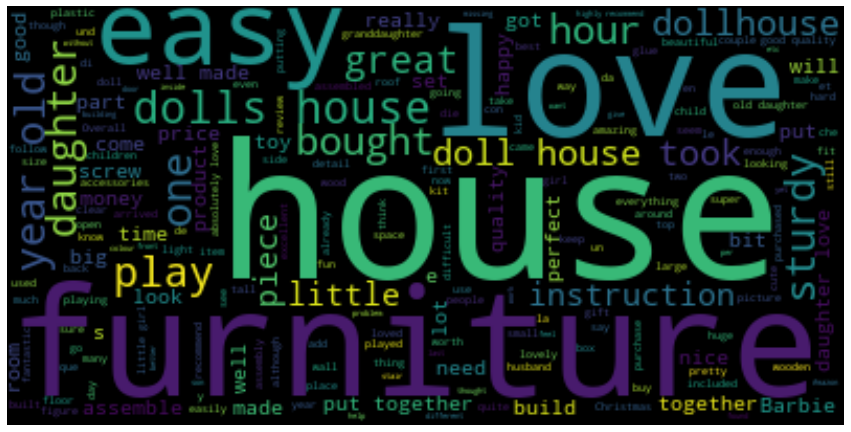

In [119]:
text = good['body'].str.cat(sep=' ')
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Negative Reviews

In [120]:
bad_most_words =bad["body"].apply(tokenize)
print('1 done')

bad_most_words =bad_most_words.apply(remove_stopwords_eng)
print('2 done')

1 done
2 done


In [121]:
list_of_words = bad_most_words.tolist()
list_of_words

bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
top_100_bad = freq_dist.most_common(100)

In [123]:
# top_100_bad

In [131]:
# text = bad['body'].str.cat(sep=' ')
# wordcloud = WordCloud().generate(text)

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Neutral Reviews

In [125]:
neutral['brands'] = neutral['product'].str.split(' ').str[0]
neutral = neutral[~neutral['brands'].isin(['Playmobil', 'Barbie', 'LEGO'])]

C:\Users\jasmi\AppData\Local\Temp\ipykernel_17420\320947550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral['brands'] = neutral['product'].str.split(' ').str[0]


In [126]:
neutral_most_words =neutral["body"].apply(tokenize)
print('1 done')

neutral_most_words =neutral_most_words.apply(remove_stopwords_eng)
print('2 done')

1 done
2 done


In [127]:
list_of_words = neutral_most_words.tolist()
list_of_words

bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
top_100_neutral = freq_dist.most_common(100)

In [129]:
# top_100_neutral

In [132]:
# text = bad['body'].str.cat(sep=' ')
# wordcloud = WordCloud().generate(text)

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Negative reviews Germany

In [157]:
bad_ger = bad[(bad['country'].isin(['Germany']))]

In [158]:
bad_ger_most_words =bad_ger["body"].apply(tokenize)
print('1 done')

bad_ger_most_words =bad_ger_most_words.apply(remove_stopwords)
print('2 done')

1 done
2 done


In [160]:
list_of_words = bad_ger_most_words.tolist()
list_of_words

bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
top_100_bad_ger = freq_dist.most_common(100)

In [162]:
# top_100_bad_ger 

Positive German Reviews

In [167]:
good_ger = good[(good['country'].isin(['Germany']))]

In [168]:
good_ger =good_ger["body"].apply(tokenize)
print('1 done')

good_ger =good_ger.apply(remove_stopwords)
print('2 done')

1 done
2 done


In [169]:
list_of_words = good_ger.tolist()
list_of_words

bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
top_100_good_ger = freq_dist.most_common(100)

In [171]:
# top_100_good_ger 

Positive Reviews / Le Toy Van - Cherry Tree Hall Large Wooden Doll House

In [188]:
good_le_toy = good[(good['product'].isin(['Le Toy Van - Cherry Tree Hall Large Wooden Doll House | 4 Storey Wooden Dolls House Play Set - Suitable For Ages 3+']))]

In [189]:
good_le_toy_words =good_le_toy["body"].apply(tokenize)
print('1 done')

good_le_toy_words =good_le_toy_words.apply(remove_stopwords_eng)
print('2 done')

1 done
2 done


In [190]:
list_of_words = good_le_toy_words.tolist()
list_of_words

bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
good_le_toy_words = freq_dist.most_common(100)

In [176]:
# good_le_toy

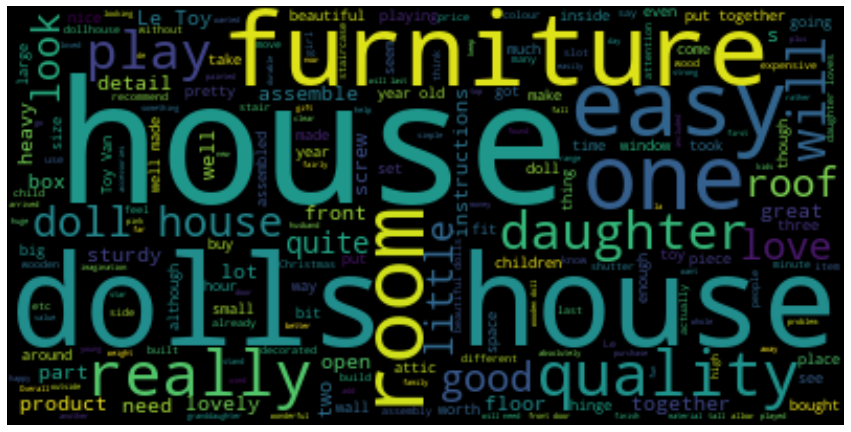

In [191]:
text = good_le_toy['body'].str.cat(sep=' ')
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Negative Reviews / Peppa Pig

In [193]:
bad_peppa = bad[(bad['product'].isin(['PEPPA PIG WOODEN PLAYHOUSE, Preschool Toy, Dolls House, Imaginative Play, Gift for 3 - 6 Year Old']))]

In [194]:
bad_peppa_words =bad_peppa["body"].apply(tokenize)
print('1 done')

bad_peppa_words =bad_peppa_words.apply(remove_stopwords_eng)
print('2 done')

1 done
2 done


In [197]:
list_of_words = bad_peppa_words.tolist()
list_of_words

bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
top_100_bad_peppa = freq_dist.most_common(100)

In [201]:
# top_100_bad_peppa

In [202]:
# text = bad_peppa['body'].str.cat(sep=' ')
# wordcloud = WordCloud().generate(text)

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Bad & good reviews KK Majestic Mansion

In [200]:
good_majestic = good[(good['product'].isin(['Kidkraft 65252 Majestic Mansion Wooden Dolls House With Furniture And Accessories Included, 4 Storey Play Set For 30 cm / 12 Inch Dolls - Amazon Exclusive']))]
bad_majestic = bad[(bad['product'].isin(['Kidkraft 65252 Majestic Mansion Wooden Dolls House With Furniture And Accessories Included, 4 Storey Play Set For 30 cm / 12 Inch Dolls - Amazon Exclusive']))]

In [203]:
good_majestic_words =good_majestic["body"].apply(tokenize)
print('1 done')

good_majestic_words =good_majestic_words.apply(remove_stopwords_eng)
print('2 done')

bad_majestic_words =bad_majestic["body"].apply(tokenize)
print('1 done')

bad_majestic_words =bad_majestic_words.apply(remove_stopwords_eng)
print('2 done')

1 done
2 done
1 done
2 done


In [204]:
list_of_words = good_majestic_words.tolist()
list_of_words

bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
good_majestic_words = freq_dist.most_common(100)

In [206]:
# good_majestic_words

In [207]:
list_of_words = bad_majestic_words.tolist()
list_of_words

bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
bad_majestic_words = freq_dist.most_common(100)

In [209]:
# bad_majestic_words

Bad / good Reviews KK Kayla

In [211]:
good_kayla = good[(good['product'].isin(['KidKraft 65092 Dollhouse Kayla Wooden House with Furniture and Accessories Included, 3 Storey Play Set for 30 cm/12 Inch Dolls, Multi - Amazon Exclusive']))]
bad_kayla = bad[(bad['product'].isin(['KidKraft 65092 Dollhouse Kayla Wooden House with Furniture and Accessories Included, 3 Storey Play Set for 30 cm/12 Inch Dolls, Multi - Amazon Exclusive']))]

In [212]:
good_kayla_words =good_kayla["body"].apply(tokenize)
print('1 done')

good_kayla_words =good_kayla_words.apply(remove_stopwords_eng)
print('2 done')

bad_kayla_words =bad_kayla["body"].apply(tokenize)
print('1 done')

bad_kayla_words =bad_kayla_words.apply(remove_stopwords_eng)
print('2 done')

1 done
2 done
1 done
2 done


In [213]:
list_of_words = bad_kayla_words.tolist()
list_of_words


bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
bad_kayla_words= freq_dist.most_common(100)

In [215]:
# bad_kayla_words

In [216]:
list_of_words = good_kayla_words.tolist()
list_of_words

bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

freq_dist = FreqDist(bow)
good_kayla_words = freq_dist.most_common(100)

In [218]:
# good_kayla_words